In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_og = pd.read_csv("german_credit_data.csv",index_col=[0])

In [3]:
data_og.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [4]:
data_og.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
990,37,male,1,own,NaN,NaN,3565,12,education
991,34,male,1,own,moderate,NaN,1569,15,radio/TV
992,23,male,1,rent,NaN,little,1936,18,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
994,50,male,2,own,NaN,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
data_og.shape

(1000, 9)

In [6]:
data_og.duplicated().sum()

0

In [7]:
data_og.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [8]:
data_og['Job'] = data_og['Job'].astype('object')

In [9]:
data_og.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [10]:
def range(data):
    return max(data) - min(data)
print(f"Range of Age is {range(data_og['Age'])}")
print(f"Range of Credit Amount is {range(data_og['Credit amount'])}")
print(f"Range of Duration is {range(data_og['Duration'])}")

Range of Age is 56
Range of Credit Amount is 18174
Range of Duration is 68


For Age, mean age is 35.5 with std dev of 11.3 , min age is 19 and max age is 75. Large range and high std dev may mean that we have some outliers.

For Credit Amount, mean is 3271 with std dev of 2823 , min is 250 and max age is 18424. Extremely high range and high std dev means that we have many outliers.

For Duration, mean is 21 with std dev of 13 , min is 4 and max age is 72. Large range and high std dev means that we have outliers.

Let's Check it now.


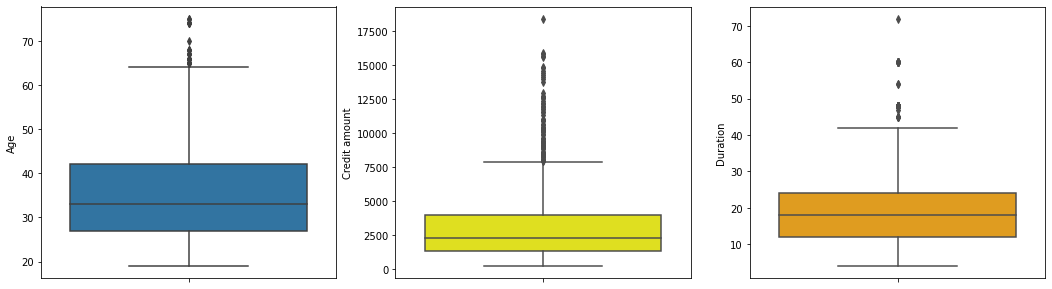

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.boxplot(data=data_og,y='Age')
plt.subplot(132)
sns.boxplot(data=data_og,y='Credit amount',color='yellow')
plt.subplot(133)
sns.boxplot(data=data_og,y='Duration',color='orange')
plt.show()

In [12]:
len(data_og)

1000

In [13]:
data_og.dtypes

Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [14]:
data_og.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [15]:
data_og.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

We have null values in Savings accounts and Checking account. Let's see it.

In [16]:
data_og['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [17]:
data_og['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [18]:
list(data_og.select_dtypes('object').columns)

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [19]:
labels = list(data_og.columns)
labels

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [20]:
labels[4] = 'Savings_balance'
labels[5] = 'Checking_balance'
labels[6] = labels[6].replace(' ','_')

In [21]:
data_og.columns = labels

In [22]:
data_og.head()

,Age,Sex,Job,Housing,Savings_balance,Checking_balance,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


## Analysis on Missing Value techniques

Adding one column for Saving account, giving it 1 if value is missing and 0 if it is present. then, I'll do a ttest for independent samples. If h0 is accepted, we say there is not difference between mean of Credit amount for Missing and non missing savings group, else we say that there is a significant difference

In [23]:
data_og['Savings_null']=np.where(data_og['Savings_balance'].isnull(),1,0)



In [24]:
data_og['Checking_null']=np.where(data_og['Checking_balance'].isnull(),1,0)


In [25]:
data_og.groupby('Savings_null')['Credit_amount'].agg(['mean','std'])

,mean,std
Savings_null,,
0,3128.990208,2731.688353
1,3906.409836,3127.705890


In [26]:
data_og.groupby('Checking_null')['Credit_amount'].agg(['mean','std'])

,mean,std
Checking_null,,
0,3361.082508,2983.045726
1,3133.101523,2554.164338


In [27]:
a = data_og['Credit_amount'][data_og['Savings_null']==0]
b = data_og['Credit_amount'][data_og['Savings_null']==1]

In [28]:
c = data_og['Credit_amount'][data_og['Checking_null']==0]
d = data_og['Credit_amount'][data_og['Checking_null']==1]

<AxesSubplot:xlabel='Credit_amount', ylabel='Count'>

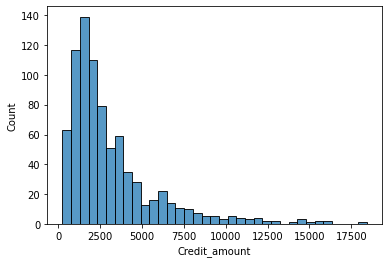

In [29]:
sns.histplot(x=a)

<AxesSubplot:xlabel='Credit_amount', ylabel='Count'>

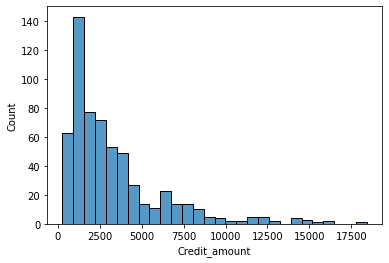

In [30]:
sns.histplot(x=c)

In [31]:
from scipy.stats import ttest_ind,levene
levene(a,b)

LeveneResult(statistic=7.802989831774662, pvalue=0.005315773476037061)

In [32]:
ttest_ind(a, b, axis=0, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-3.1074397575099204, pvalue=0.002107085162161437)

For savings account, the credit amount is significantly different for missing and non-missing savings. This means that the value are NOT MCAR. Hence, other methods like using algorithm to predict missing values or making a new category for missing savings data column might give better results.

In [33]:
levene(c,d)

LeveneResult(statistic=3.1572761851272166, pvalue=0.07589374706517359)

In [34]:
ttest_ind(c, d, axis=0, equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=1.2483431616030414, pvalue=0.2121981899716896)

For checking account, the mean value of credit amount is not significantly different for missing and non-missing checking account values. This means that the value are MCAR. Hence, mode can be used here to impute values and would most probably give good results

In [35]:
data_og = data_og.drop(columns=['Savings_null','Checking_null'])

# Imputing mode and applying Linear Regression

In [36]:
data1 = data_og.copy()

In [37]:
data1['Checking_balance'] = data1['Checking_balance'].fillna(data1['Checking_balance'].mode())
data1['Savings_balance'] = data1['Savings_balance'].fillna(data1['Savings_balance'].mode())

In [38]:
categorical_cols = list(data1.select_dtypes('object'))

In [39]:
dummies = pd.get_dummies(data1[categorical_cols],drop_first=True)

In [40]:
data1 = data1.drop(columns=categorical_cols)

In [41]:
data1 = data1.join(dummies)

In [42]:
data1.shape

(1000, 21)

In [43]:
y = data1['Credit_amount']
X = data1.drop(columns=['Credit_amount'])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90)

In [45]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)


0.463425396668947

In [46]:
pred = LR.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

4573666.981094643


<AxesSubplot:>

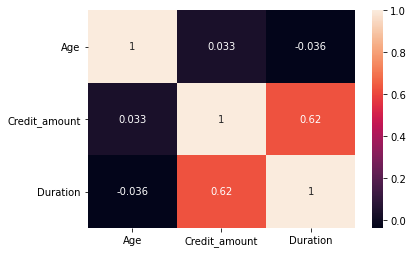

In [48]:
# multicollinearity
sns.heatmap(data_og.corr(),annot=True)

In [49]:
data_og.head()

,Age,Sex,Job,Housing,Savings_balance,Checking_balance,Credit_amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Creating new category for Savings Account and applying Linear Regression

In [50]:
data_og['Checking_balance'] = data_og['Checking_balance'].fillna(data_og['Checking_balance'].mode())

In [51]:
data_og['Savings_balance'] = data_og['Savings_balance'].fillna('Unknown')
categorical_cols = list(data_og.select_dtypes('object'))
dummies = pd.get_dummies(data_og[categorical_cols],drop_first=True)
data_new = data_og.drop(columns=categorical_cols)
data_new = data_new.join(dummies)

In [52]:
data_og['Savings_balance'].value_counts()

little        603
Unknown       183
moderate      103
quite rich     63
rich           48
Name: Savings_balance, dtype: int64

In [53]:
data_new.shape

(1000, 22)

In [54]:
y = data_new['Credit_amount']
X = data_new.drop(columns=['Credit_amount'])

In [55]:
data_new.columns

Index(['Age', 'Credit_amount', 'Duration', 'Sex_male', 'Job_1', 'Job_2',
       'Job_3', 'Housing_own', 'Housing_rent', 'Savings_balance_little',
       'Savings_balance_moderate', 'Savings_balance_quite rich',
       'Savings_balance_rich', 'Checking_balance_moderate',
       'Checking_balance_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=90)

In [56]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)

0.46408576999559836

In [57]:
pred = LR.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,pred))

4511091.212487984


In [68]:
import builtins
print(builtins.range(8))

range(0, 8)
